In [16]:
module = '../out/correlations/S288C_%s.modules.tsv'
go = '../out/correlations/%s.go.tsv'

In [17]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [18]:
import numpy as np
import pandas as pd

In [19]:
strains = ['S288C',
           'UWOP',
           'Y55',
           'YPS']
scolor = {x: c
          for x,c in zip(strains,
                         sns.color_palette('Set2', len(strains)))}

In [28]:
ds = {}
dm = {}
dn = {}
dl = {}
for strain in strains:
    if strain == 'S288C':
        continue
    ds[strain] = {}
    dm[strain] = {}
    dn[strain] = {}
    dl[strain] = {}
    b = True
    for l in open(module % strain):
        if b:
            b = False
            continue
        i, genes, score = l.rstrip().split()
        i = int(i)
        ds[strain][i] = float(score)
        dm[strain][i] = dm[strain].get(i, [])
        dm[strain][i].append(len(genes.split(',')))
        dn[strain][i] = dn[strain].get(i, [])
        dn[strain][i].append(len(genes.split(',')))
        dl[strain][i] = dl[strain].get(i, [])
        dl[strain][i].append(len(genes.split(',')))
    for k in dm[strain]:
        dm[strain][k] = np.array(dm[strain][k]).mean()
        dn[strain][k] = len(dn[strain][k])
        dl[strain][k] = np.array(dl[strain][k]).max()

In [29]:
dg = {}
for strain in strains:
    if strain == 'S288C':
        continue
    g = pd.read_table(go % strain)
    g.set_index('iteration', inplace=True)
    g = (g[g['p-corrected'] <= 0.05].groupby(['iteration', 'module']).count().groupby('iteration').count() / g.groupby(['iteration', 'module']).count().groupby('iteration').count())['score']
    dg[strain] = g.to_dict()

In [30]:
s = pd.DataFrame(ds)
m = pd.DataFrame(dm)
n = pd.DataFrame(dn)
l = pd.DataFrame(dl)
g = pd.DataFrame(dg)

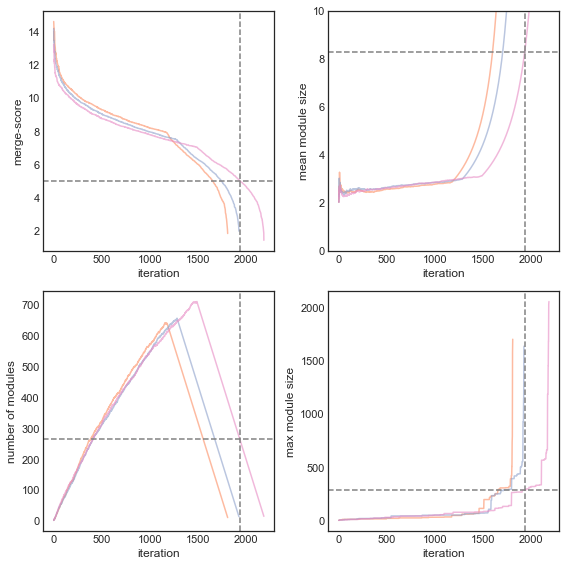

In [33]:
plt.figure(figsize=(8, 8))

i = s.T.mean()[s.T.mean() > 5].index[-1]

plt.subplot(221)

for strain in s.columns:
    plt.plot(s.index,
             s[strain],
             '-',
             color=scolor[strain],
             alpha=0.6)
    
plt.axhline(5,
            color='grey',
            linestyle='dashed')
plt.axvline(i,
            color='grey',
            linestyle='dashed')

plt.xlabel('iteration')
plt.ylabel('merge-score')
    
plt.subplot(222)

for strain in m.columns:
    plt.plot(m.index,
             m[strain],
             '-',
             color=scolor[strain],
             alpha=0.6)
    
plt.axhline(m.loc[i].mean(),
            color='grey',
            linestyle='dashed')
plt.axvline(i,
            color='grey',
            linestyle='dashed')

plt.xlabel('iteration')
plt.ylabel('mean module size')

plt.ylim(-0.05, 10)
    
plt.subplot(223)

for strain in n.columns:
    plt.plot(n.index,
             n[strain],
             '-',
             color=scolor[strain],
             alpha=0.6)
    
plt.axhline(n.loc[i].mean(),
            color='grey',
            linestyle='dashed')
plt.axvline(i,
            color='grey',
            linestyle='dashed')

plt.xlabel('iteration')
plt.ylabel('number of modules')

plt.subplot(224)

for strain in m.columns:
    plt.plot(l.index,
             l[strain],
             '-',
             color=scolor[strain],
             alpha=0.6)
    
plt.axhline(l.loc[i].mean(),
            color='grey',
            linestyle='dashed')
plt.axvline(i,
            color='grey',
            linestyle='dashed')

plt.xlabel('iteration')
plt.ylabel('max module size')

plt.tight_layout();

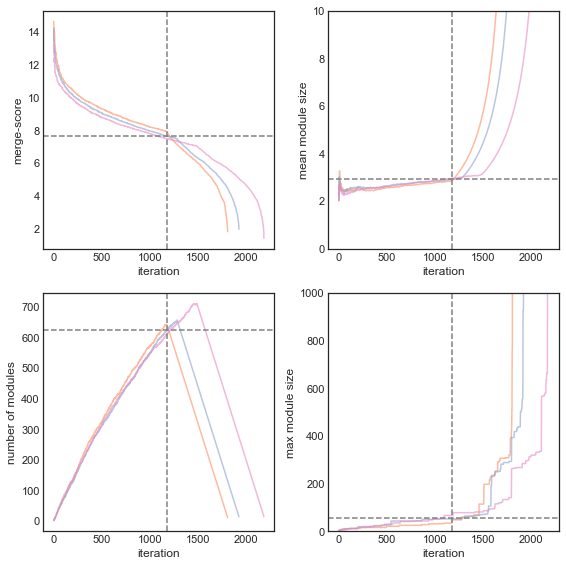

In [34]:
plt.figure(figsize=(8, 8))

i = n.T.mean().sort_values().index[-1]

plt.subplot(221)

for strain in s.columns:
    plt.plot(s.index,
             s[strain],
             '-',
             color=scolor[strain],
             alpha=0.6)
    
plt.axhline(s.loc[i].mean(),
            color='grey',
            linestyle='dashed')
plt.axvline(i,
            color='grey',
            linestyle='dashed')

plt.xlabel('iteration')
plt.ylabel('merge-score')
    
plt.subplot(222)

for strain in m.columns:
    plt.plot(m.index,
             m[strain],
             '-',
             color=scolor[strain],
             alpha=0.6)
    
plt.axhline(m.loc[i].mean(),
            color='grey',
            linestyle='dashed')
plt.axvline(i,
            color='grey',
            linestyle='dashed')

plt.xlabel('iteration')
plt.ylabel('mean module size')

plt.ylim(-0.05, 10)
    
plt.subplot(223)

for strain in n.columns:
    plt.plot(n.index,
             n[strain],
             '-',
             color=scolor[strain],
             alpha=0.6)
    
plt.axhline(n.loc[i].mean(),
            color='grey',
            linestyle='dashed')
plt.axvline(i,
            color='grey',
            linestyle='dashed')

plt.xlabel('iteration')
plt.ylabel('number of modules')

plt.subplot(224)

for strain in m.columns:
    plt.plot(l.index,
             l[strain],
             '-',
             color=scolor[strain],
             alpha=0.6)
    
plt.axhline(l.loc[i].mean(),
            color='grey',
            linestyle='dashed')
plt.axvline(i,
            color='grey',
            linestyle='dashed')

plt.ylim(-0.05, 1000)

plt.xlabel('iteration')
plt.ylabel('max module size')

plt.tight_layout();

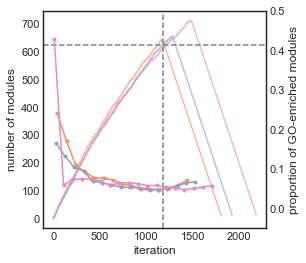

In [35]:
plt.figure(figsize=(4, 4))

for strain in n.columns:
    plt.plot(n.index,
             n[strain],
             '-',
             color=scolor[strain],
             alpha=0.6)
    
plt.axhline(n.loc[i].mean(),
            color='grey',
            linestyle='dashed')
plt.axvline(i,
            color='grey',
            linestyle='dashed')

plt.xlabel('iteration')
plt.ylabel('number of modules')

plt.twinx()
for strain in g.columns:
    plt.plot(g[strain].dropna().index,
             g[strain].dropna(),
             '.-',
             color=scolor[strain])

plt.ylabel('proportion of GO-enriched modules')
plt.ylim(-0.05, 0.5);

In [36]:
g

,UWOP,Y55,YPS
11,NaN,NaN,0.428571
26,NaN,0.166667,NaN
43,0.241379,NaN,NaN
111,NaN,NaN,0.058824
126,NaN,0.132530,NaN
143,0.170000,NaN,NaN
211,NaN,NaN,0.074830
226,NaN,0.104167,NaN
243,0.109091,NaN,NaN
311,NaN,NaN,0.073529


<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>